In [21]:
import re
import numpy as np
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import string 
import nltk 
import warnings 
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
import seaborn as sns 
color = sns.color_palette()
%matplotlib inline 
import plotly.offline as py 
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go 
import plotly.tools as tls 
import plotly.express as px 
warnings.filterwarnings("ignore", category=DeprecationWarning )

%matplotlib inline

In [2]:
dataset = pd.read_csv('A2.csv')
dataset.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOGieupSm9JKS3SrU6ZEbcsDvCoEdiQ7bYHXQ5U...,gaurav chadha,https://lh3.googleusercontent.com/a-/AOh14Gg9p...,Well made app to track the bmi and it's possib...,5,38,3.2.0,2020-08-11 12:32:46,NaN,NaN
1,gp:AOqpTOG1znuzbTjk9DtUYdCwX4umk44qXHzYIcF8Cab...,Cat Sadler,https://lh3.googleusercontent.com/a-/AOh14GizE...,I don't like the new update. By that I mean I ...,2,24,3.0.3,2018-12-27 12:17:03,Hello!\nThank you for your feedback! This is v...,2019-01-03 22:03:44
2,gp:AOqpTOG5ITVzoYlb7xkemOc0LqvTN7mbfHsxMYwAfTA...,Андрей Шишкин,https://lh3.googleusercontent.com/a-/AOh14GheX...,Used this app earlier and now decided to insta...,1,13,3.1.2,2019-09-22 06:18:15,Hi Andrey!\nThank you for letting us know abou...,2019-09-25 19:16:40
3,gp:AOqpTOF7Lazqzyrt1tMjd-UU9kTLaokGhGAnABHPv0R...,Kerry13,https://play-lh.googleusercontent.com/-cVll82r...,This app helps me keep track of my right weigh...,5,8,3.2.0,2020-09-01 14:57:16,NaN,NaN
4,gp:AOqpTOH5ys_rs8RuHF_T2b-w1GLFWJJp5vLkwukHmCK...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Not really happy with the recent changes. What...,3,47,NaN,2019-02-10 21:24:39,Hello!\nI'll pass your feedback to developers ...,2019-02-13 19:41:50


In [3]:
dataset = dataset.drop(columns=['reviewId','userImage', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt'])


In [4]:
dataset.dropna()

,userName,content,score
0,gaurav chadha,Well made app to track the bmi and it's possib...,5
1,Cat Sadler,I don't like the new update. By that I mean I ...,2
2,Андрей Шишкин,Used this app earlier and now decided to insta...,1
3,Kerry13,This app helps me keep track of my right weigh...,5
4,A Google user,Not really happy with the recent changes. What...,3
...,...,...,...
6201,Yuuki Sunny,GOOD,5
6202,Leah Balabag,nice,3
6203,RUSHIKESH SURYAWANSHI,Good,5
6204,sibaprasad mishra,Nice,5


In [5]:
#data cleaning 
def clean_text(text):
    text = str(text)
    #filter to allow only aphabets
    text = re.sub(r'[^a-zA-z\']', ' ', text)
    #remove unicode characters 
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    #remove special characters, numbers, punctuations
   # text = re.sub(r'[^a-zA-Z#\']', ' ', text)
    #removing shortwords
    text = ' '.join([w for w in text.split() if len(w)>3])
    #lower case 
    text = text.lower()
    
    return text

In [6]:
dataset['clean_review'] = dataset.content.apply(lambda x: np.vectorize(clean_text)(x))

In [7]:
dataset = dataset.dropna()

In [8]:
dataset

,userName,content,score,clean_review
0,gaurav chadha,Well made app to track the bmi and it's possib...,5,well made track it's possible track your weigh...
1,Cat Sadler,I don't like the new update. By that I mean I ...,2,don't like update that mean liked sliding scal...
2,Андрей Шишкин,Used this app earlier and now decided to insta...,1,used this earlier decided install again doesn'...
3,Kerry13,This app helps me keep track of my right weigh...,5,this helps keep track right weight range height
4,A Google user,Not really happy with the recent changes. What...,3,really happy with recent changes what happened...
...,...,...,...,...
6201,Yuuki Sunny,GOOD,5,good
6202,Leah Balabag,nice,3,nice
6203,RUSHIKESH SURYAWANSHI,Good,5,good
6204,sibaprasad mishra,Nice,5,nice


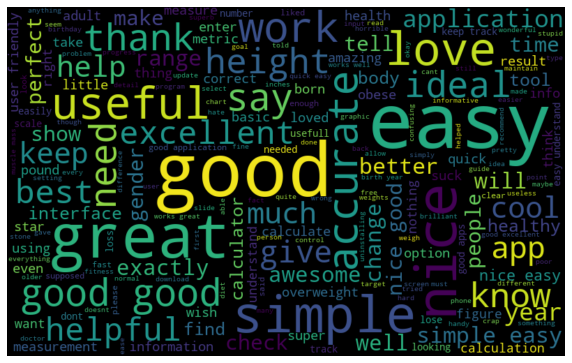

In [9]:
stopwords = set(STOPWORDS)
stopwords.update(['this', 'used', 'really', " ' ", "weight"])

words = " ".join(str(text) for text in dataset.clean_review)
wordcloud = WordCloud(stopwords=stopwords, width=800, height=500, random_state=30, max_font_size=110).generate(words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
positive = dataset[dataset['score']>3]
negative = dataset[dataset['score']<3]

In [12]:
positive.head()

,userName,content,score,clean_review
0,gaurav chadha,Well made app to track the bmi and it's possib...,5,well made track it's possible track your weigh...
3,Kerry13,This app helps me keep track of my right weigh...,5,this helps keep track right weight range height
5,Capt Daman Datta,You guys deserve a 5 Star rating. 👍👍 The lovel...,5,guys deserve star rating lovely display which ...
8,maloe ottuku,"Very good to calculate BMI as a nurse, it make...",5,very good calculate nurse makes work easier
9,Blair Nesbitt,It's great for a free app. if you believe BMI'...,4,it's great free believe bmi's have credence yo...


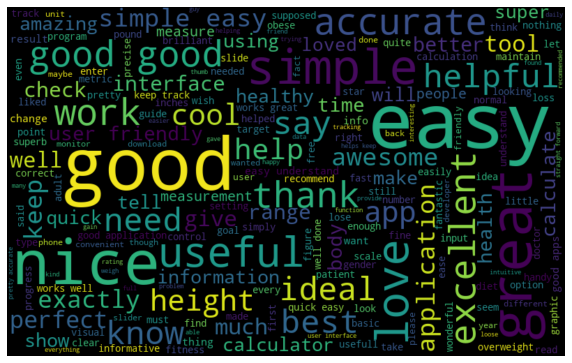

In [13]:
#stopwords = set(STOPWORDS)
#stopwords.update(['this', 'used', 'really', " ' ", "weight"])

pros = " ".join(str(text) for text in positive.clean_review)
wordcloud_p = WordCloud(stopwords=stopwords, width=800, height=500, random_state=30, max_font_size=110).generate(pros)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud_p, interpolation='bilinear')
plt.axis('off')
plt.show()

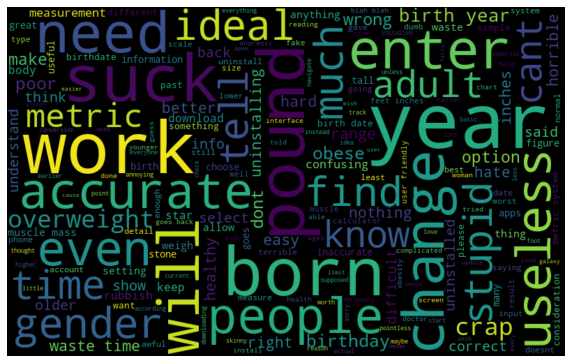

In [16]:
stopwords_n = set(STOPWORDS)
stopwords_n.update(['this', 'used', 'really', " ' ", "weight", 'height', 'says', 'good', 'give', 'peopl', 'take'])

neg = " ".join(str(text) for text in negative.clean_review)
wordcloud_n = WordCloud(stopwords=stopwords_n, width=800, height=500, random_state=30, max_font_size=110).generate(neg)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud_n, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
dataset['sentiments'] = np.where(dataset['score']>3,1,-1)

In [20]:
dataset.head()

,userName,content,score,clean_review,sentiments
0,gaurav chadha,Well made app to track the bmi and it's possib...,5,well made track it's possible track your weigh...,1
1,Cat Sadler,I don't like the new update. By that I mean I ...,2,don't like update that mean liked sliding scal...,-1
2,Андрей Шишкин,Used this app earlier and now decided to insta...,1,used this earlier decided install again doesn'...,-1
3,Kerry13,This app helps me keep track of my right weigh...,5,this helps keep track right weight range height,1
4,A Google user,Not really happy with the recent changes. What...,3,really happy with recent changes what happened...,-1


In [25]:
dataset['sentiments'] = dataset['sentiments'].replace({-1:'negative'})
dataset['sentiments'] = dataset['sentiments'].replace({1:'postive'})

fig = px.histogram(dataset, x='sentiments')
fig.update_traces(marker_color='indianred', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
#figsave('A2-analysis.png')
fig.show()

In [26]:
conda install -c plotly python-kaleido


Solving environment: | 
  - anaconda/linux-64::certifi-2020.6.20-py37_0, anaconda/linux-64::conda-4.8.5-py37_0, anaconda/linux-64::openssl-1.1.1h-h7b6447c_0
  - anaconda/linux-64::certifi-2020.6.20-py37_0, anaconda/linux-64::openssl-1.1.1h-h7b6447c_0, defaults/linux-64::conda-4.8.5-py37_0
  - anaconda/linux-64::conda-4.8.5-py37_0, anaconda/linux-64::openssl-1.1.1h-h7b6447c_0, defaults/linux-64::certifi-2020.6.20-py37_0
  - anaconda/linux-64::openssl-1.1.1h-h7b6447c_0, defaults/linux-64::certifi-2020.6.20-py37_0, defaults/linux-64::conda-4.8.5-py37_0
  - anaconda/linux-64::conda-4.8.5-py37_0, defaults/linux-64::certifi-2020.6.20-py37_0, defaults/linux-64::openssl-1.1.1h-h7b6447c_0
  - defaults/linux-64::certifi-2020.6.20-py37_0, defaults/linux-64::conda-4.8.5-py37_0, defaults/linux-64::openssl-1.1.1h-h7b6447c_0
  - anaconda/linux-64::certifi-2020.6.20-py37_0, anaconda/linux-64::conda-4.8.5-py37_0, defaults/linux-64::openssl-1.1.1h-h7b6447c_0
  - anaconda/linux-64::certifi-2020.6.20-py37

In [29]:
conda install -c plotly plotly-orca

Solving environment: / 
  - anaconda/linux-64::certifi-2020.6.20-py37_0, anaconda/linux-64::conda-4.8.5-py37_0, anaconda/linux-64::openssl-1.1.1h-h7b6447c_0
  - anaconda/linux-64::certifi-2020.6.20-py37_0, anaconda/linux-64::openssl-1.1.1h-h7b6447c_0, defaults/linux-64::conda-4.8.5-py37_0
  - anaconda/linux-64::conda-4.8.5-py37_0, anaconda/linux-64::openssl-1.1.1h-h7b6447c_0, defaults/linux-64::certifi-2020.6.20-py37_0
  - anaconda/linux-64::openssl-1.1.1h-h7b6447c_0, defaults/linux-64::certifi-2020.6.20-py37_0, defaults/linux-64::conda-4.8.5-py37_0
  - anaconda/linux-64::conda-4.8.5-py37_0, defaults/linux-64::certifi-2020.6.20-py37_0, defaults/linux-64::openssl-1.1.1h-h7b6447c_0
  - defaults/linux-64::certifi-2020.6.20-py37_0, defaults/linux-64::conda-4.8.5-py37_0, defaults/linux-64::openssl-1.1.1h-h7b6447c_0
  - anaconda/linux-64::certifi-2020.6.20-py37_0, anaconda/linux-64::conda-4.8.5-py37_0, defaults/linux-64::openssl-1.1.1h-h7b6447c_0
  - anaconda/linux-64::certifi-2020.6.20-py37

In [30]:

    
fig.write_image("image/A2.png")

In [28]:

fig.write_html("A2.html")